<a href="https://colab.research.google.com/github/gulf1324/Project2/blob/main/N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [2]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
regex = r"[^a-zA-Z0-9 ]"
regex

'[^a-zA-Z0-9 ]'

In [4]:
test_str = ("(Natural Language Processing) is easy!, AI!\n")
subst = ""
result = re.sub(regex, subst, test_str)
result

'Natural Language Processing is easy AI'

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- description 중복값을 제거하세요. (keep='last')


In [5]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [6]:
df[df['description'].duplicated()]  

,Unnamed: 0,title,company,description,url
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
9,9,"Data Product Engineer, Revenue Science",Twitter,"By applying for this role, you could choose to...",https://www.indeed.com/viewjob?jk=230fa72e4305...
10,10,"Data Product Engineer, Revenue Science",Twitter,"By applying for this role, you could choose to...",https://www.indeed.com/viewjob?jk=230fa72e4305...
11,11,"Data Product Engineer, Revenue Science",Twitter,"By applying for this role, you could choose to...",https://www.indeed.com/viewjob?jk=230fa72e4305...
...,...,...,...,...,...
1291,1291,Senior Data Scientist,Rancho BioSciences,Position Description:\nFull Time/Remote\nRanch...,https://www.indeed.com/viewjob?jk=210f94ba5e18...
1292,1292,Analytics Data Scientist Senior Advisor,CVS Health,Manages and is responsible for the successful ...,https://www.indeed.com/viewjob?jk=e452e3c8536c...
1293,1293,"Senior Data Scientist, Analytics & Inference",Codecademy,"Hello, World! Codecademy has helped tens of mi...",https://www.indeed.com/viewjob?jk=08cb5b159d70...
1296,1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...,https://www.indeed.com/viewjob?jk=674682157fdf...


In [7]:
df = df[['title','company','description']]
df = df[~(df['description'].duplicated(keep='last'))]   # Masking
df = df.reset_index(drop=True)                          # reset index

# (= df.drop_duplicates(subset='description', keep='last', inplace=True) )

df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
...,...,...,...
752,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
753,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...
754,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...
755,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise..."


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [8]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")   # nlp 
tokenizer = Tokenizer(nlp.vocab)

In [9]:
def return_low_num(doc):
  doc = re.sub('\n+',' ',doc)                # 줄바꿈부터 다음 문자 전까지의 공백, ' '로 replace
  doc = re.sub(r"[^a-z0-9\n ]","",doc)       # 소문자, 숫자, 줄바꿈, 공백 substring 제외, ''로 replace
  doc = re.sub('  ','',doc)                  # 2연속 특수문자 -> '  ', '' 로 replace
  return doc                                 #   -> ex) "overview: american..." -> overview  american... -> overviewamerican... (주의)

In [10]:
df['description'][756]

"tl;dr\nSpring is accelerating the discovery of therapies for aging and its related\ndiseases\n[https://medium.com/spring-discovery/accelerating-the-discovery-of-therapies-for-aging-and-its-related-diseases-7c6a2109189f]. Machine learning and data science are at our core, and we're building a rare computational team that works closely with our biologists, together fighting disease.\n\nImpact\nAging is the single greatest risk factor for the most detrimental diseases on Earth — cardiovascular disease, neurodegenerative disease, pulmonary disease, cancer, muscle wasting, and more — and drugs that slow the biological damage accumulated while aging have the potential to reduce the incidences of these diseases, possibly simultaneously. We believe that in the not-too-distant future, the discovery of therapies for aging will provide some of the most effective tools in history for reducing our burden of disease and extending our healthy lifespan.\n\nOur mission is to dramatically accelerate th

In [11]:
df['description'].tail(1).values[0]

"tl;dr\nSpring is accelerating the discovery of therapies for aging and its related\ndiseases\n[https://medium.com/spring-discovery/accelerating-the-discovery-of-therapies-for-aging-and-its-related-diseases-7c6a2109189f]. Machine learning and data science are at our core, and we're building a rare computational team that works closely with our biologists, together fighting disease.\n\nImpact\nAging is the single greatest risk factor for the most detrimental diseases on Earth — cardiovascular disease, neurodegenerative disease, pulmonary disease, cancer, muscle wasting, and more — and drugs that slow the biological damage accumulated while aging have the potential to reduce the incidences of these diseases, possibly simultaneously. We believe that in the not-too-distant future, the discovery of therapies for aging will provide some of the most effective tools in history for reducing our burden of disease and extending our healthy lifespan.\n\nOur mission is to dramatically accelerate th

In [12]:
return_low_num((df['description'][756].lower()))  # 코딩 과제 3번 -> tldr

'tldr spring is accelerating the discovery of therapies for aging and its related diseases httpsmediumcomspringdiscoveryacceleratingthediscoveryoftherapiesforaginganditsrelateddiseases7c6a2109189f machine learning and data science are at our core and were building a rare computational team that works closely with our biologists together fighting disease impact aging is the single greatest risk factor for the most detrimental diseases on earthcardiovascular disease neurodegenerative disease pulmonary disease cancer muscle wasting and moreand drugs that slow the biological damage accumulated while aging have the potential to reduce the incidences of these diseases possibly simultaneously we believe that in the nottoodistant future the discovery of therapies for aging will provide some of the most effective tools in history for reducing our burden of disease and extending our healthy lifespan our mission is to dramatically accelerate the realization of that future and were bringing a new 

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [13]:
# 출처 : https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas
# apply() - works on a row / column basis of a DataFrame.
# applymap() - works element-wise on a DataFrame.
# map() - works element-wise on a Series.
df1 = df.copy()
df1['description'] = df1['description'].apply(lambda x : x.lower()).apply(lambda x: return_low_num(x))            # lower(), return_low_num() 순 apply
df1

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job details description essential duties and r...
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...
2,Sr. Data Scientist (Remote),American Credit Acceptance,overview american credit acceptance seeks a hi...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporateinvestment bank cib is a g...
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...
...,...,...,...
752,Senior Data & Applied Scientist,Microsoft,senior dataapplied scientist do you have a pas...
753,Senior Data Scientist,Takeda Pharmaceuticals,job description objectives effectively working...
754,Senior Data Scientist,eBay Inc.,ebay is a global commerce leader that allows y...
755,Senior Data Scientist,Cox Automotive,cox automotive a subsidiary of cox enterprises...


In [14]:
tokens = []

for doc in tokenizer.pipe(df1['description']):
                                                        
    doc_tokens = [token.text for token in doc]        # token for token in doc -> 0 [job, details, description, essential,...] -> output 같아보이지만 type => spacy.tokens.token.Token =/= str (x) 
                                                      # 따라서 token.text -> str 변환 (lower(),re.sub()은 전 단계에서 진행)
    tokens.append(doc_tokens)                         
                                                      # c.f.) df1['description_tokens'][0][0], type(df1['description_tokens'][0][0])
                                                      #   >>> (job, spacy.tokens.token.Token)
df1['description_tokens'] = tokens
df1['description_tokens']

0      [job, details, description, essential, duties,...
1      [as, a, team, member, in, the, finance, and, i...
2      [overview, american, credit, acceptance, seeks...
3      [jp, morgans, corporateinvestment, bank, cib, ...
4      [at, vystar, we, offer, competitive, pay, an, ...
                             ...                        
752    [senior, dataapplied, scientist, do, you, have...
753    [job, description, objectives, effectively, wo...
754    [ebay, is, a, global, commerce, leader, that, ...
755    [cox, automotive, a, subsidiary, of, cox, ente...
756    [tldr, spring, is, accelerating, the, discover...
Name: description_tokens, Length: 757, dtype: object

In [15]:
df1['description_tokens'][0][0], type(df1['description_tokens'][0][0])

('job', str)

In [16]:
tokens = []                                                                             # 직접 re.sub(), lower(), tokenize 

for doc in tokenizer.pipe(df1['description']):
    
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    
    tokens.append(doc_tokens)

asdf = pd.DataFrame(data=None,columns=['asd'])
asdf['asd']=tokens
asdf['asd']

0      [job, details, description, essential, duties,...
1      [as, a, team, member, in, the, finance, and, i...
2      [overview, american, credit, acceptance, seeks...
3      [jp, morgans, corporateinvestment, bank, cib, ...
4      [at, vystar, we, offer, competitive, pay, an, ...
                             ...                        
752    [senior, dataapplied, scientist, do, you, have...
753    [job, description, objectives, effectively, wo...
754    [ebay, is, a, global, commerce, leader, that, ...
755    [cox, automotive, a, subsidiary, of, cox, ente...
756    [tldr, spring, is, accelerating, the, discover...
Name: asd, Length: 757, dtype: object

In [17]:
type(asdf['asd'][0][0])

str

In [18]:
for i1,v1 in enumerate(df1['description_tokens'][0]):             # 같은지 확인
  for i2,v2 in enumerate(asdf['asd'][0]):
    if (i1==i2) and (v1 == v2):
      None
    if (i1==i2) and (v1 != v2):
      print(f"{i1,v1,v2} False")  

In [19]:
from collections import Counter

word_counts = Counter()

df1['description_tokens'].apply(lambda x: word_counts.update(x))                 # word_count 객체에 str type "token" 들을 update

word_counts.most_common(10)

[('and', 21824),
 ('to', 12677),
 ('the', 10517),
 ('of', 8833),
 ('data', 7358),
 ('in', 6763),
 ('a', 6426),
 ('with', 5724),
 ('for', 4123),
 ('or', 3799)]

In [20]:
# 출처 : N421 개념노트
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [21]:
df_wc = word_count(df1['description_tokens'])
df_wc.head(10) # 과제 4번

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
122,and,755,21824,1.0,0.056631,0.056631,0.997358
166,to,754,12677,2.0,0.032896,0.089527,0.996037
144,the,745,10517,3.0,0.027291,0.116817,0.984148
63,of,745,8833,4.0,0.022921,0.139738,0.984148
163,data,738,7358,5.0,0.019093,0.158831,0.974901
44,in,748,6763,6.0,0.017549,0.176381,0.988111
128,a,739,6426,7.0,0.016675,0.193056,0.976222
210,with,742,5724,8.0,0.014853,0.207909,0.980185
342,for,727,4123,9.0,0.010699,0.218608,0.960370
16,or,708,3799,10.0,0.009858,0.228466,0.935271


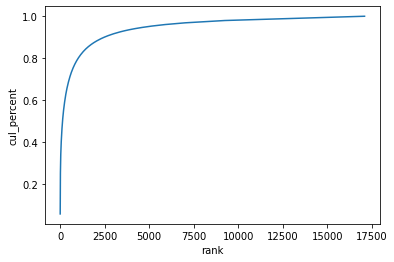

In [22]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data= df_wc);

# rank 낮아질수록 축적도 낮아짐

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [35]:
STOP_WORDS = nlp.Defaults.stop_words.union(["data", "work"])                    # 불용어 추가

In [36]:
tokens = []                                                                     # tokens -> list, 이후 DataFrame의 column

for doc in tokenizer.pipe(df1['description']):                                  # tokenizer 의 doc 중                                                     ex) Job Details Description Essential Duties and...  
    
    doc_tokens = []                                                                # doc_tokens -> list, 이후 DataFrame의 각 row 구성                     ex) [job, details, description, essential, duties,...]
    
    for token in doc:                                                              # doc 의 token 중                                                      ex) Job Details Description Essential Duties Overview: J.P. ...
        if token.text not in STOP_WORDS:                                               # token.text 이 불용어가 아니면:
            doc_tokens.append(token.text)                                                   # doc_tokens 에 (re.sub(r"[^a-z0-9]", "", token.text) 형태로 append
                                                                                            # -> 최종 : [job, details, description, essential, duties,...]
    
    tokens.append(doc_tokens)                                                               # doc_tokens (list) 를 tokens list에 append                   ex) tokens = [[doc_tokens],[doc_tokens], ... ,[...]]
    
df1['tokens_stop_words_applied'] = tokens

In [37]:
df1.head(5)

,title,company,description,description_tokens,tokens_stop_words_applied
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job details description essential duties and r...,"[job, details, description, essential, duties,...","[job, details, description, essential, duties,..."
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...,"[as, a, team, member, in, the, finance, and, i...","[team, member, finance, internal, audit, depar..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,overview american credit acceptance seeks a hi...,"[overview, american, credit, acceptance, seeks...","[overview, american, credit, acceptance, seeks..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporateinvestment bank cib is a g...,"[jp, morgans, corporateinvestment, bank, cib, ...","[jp, morgans, corporateinvestment, bank, cib, ..."
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...,"[at, vystar, we, offer, competitive, pay, an, ...","[vystar, offer, competitive, pay, excellent, b..."


In [38]:
df_wc_stop = word_count(df1['tokens_stop_words_applied'])
df_wc_stop.head(10)          # 과제 5번 -> competitive

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
46,experience,702,3382,1.0,0.014207,0.014207,0.927345
477,business,535,2048,2.0,0.008603,0.022811,0.706737
193,science,607,1625,3.0,0.006826,0.029637,0.801849
172,team,585,1616,4.0,0.006789,0.036426,0.772787
213,learning,522,1579,5.0,0.006633,0.043059,0.689564
178,analysis,512,1330,6.0,0.005587,0.048646,0.676354
55,skills,543,1210,7.0,0.005083,0.053730,0.717305
514,machine,469,1142,8.0,0.004797,0.058527,0.619551
214,analytics,424,1095,9.0,0.004600,0.063127,0.560106
95,models,456,1026,10.0,0.004310,0.067437,0.602378


In [39]:
df_wc_stop[(df_wc_stop['word']== 'data')|(df_wc_stop['word']== 'work')]            # 불용어 제거 확인

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent


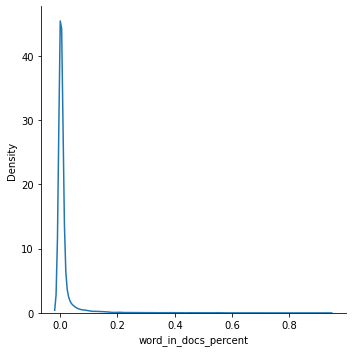

In [40]:
# 단어 분포 시각화 => 너무 자주 사용되는 단어, 너무 드물게 사용되는 단어 제외
sns.displot(df_wc_stop['word_in_docs_percent'],kind='kde')

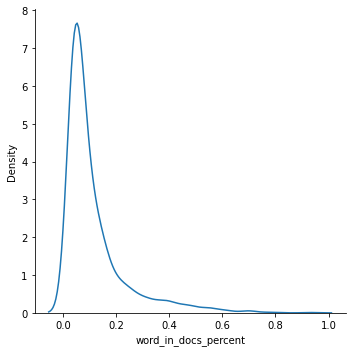

In [41]:
# 최소한 3% 이상 문서에 나타나는 단어들만 선택하기

wc_temp = df_wc_stop[df_wc_stop['word_in_docs_percent'] >= 0.03]

sns.displot(wc_temp['word_in_docs_percent'], kind='kde');

In [42]:
wc_temp.tail(10) # stop words / 3% 이상만

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
1538,automating,23,23,1602.0,0.000097,0.788337,0.030383
1928,adept,23,23,1603.0,0.000097,0.788434,0.030383
2015,highquality,23,23,1604.0,0.000097,0.788531,0.030383
2188,truly,23,23,1606.0,0.000097,0.788724,0.030383
2705,easily,23,23,1613.0,0.000097,0.789400,0.030383
2743,advances,23,23,1614.0,0.000097,0.789497,0.030383
3177,stronger,23,23,1620.0,0.000097,0.790077,0.030383
3469,ultimately,23,23,1623.0,0.000097,0.790366,0.030383
3985,perl,23,23,1626.0,0.000097,0.790656,0.030383
4839,holidays,23,23,1629.0,0.000097,0.790946,0.030383


In [44]:
df_wc_stop.tail(10)   # stop_words

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
16824,respectfully,1,1,16833.0,0.000004,0.999962,0.001321
16833,ambiguityand,1,1,16834.0,0.000004,0.999966,0.001321
16829,encountered,1,1,16835.0,0.000004,0.999971,0.001321
16819,feedbackfocused,1,1,16836.0,0.000004,0.999975,0.001321
16834,environmentleadership,1,1,16837.0,0.000004,0.999979,0.001321
16821,felicis,1,1,16838.0,0.000004,0.999983,0.001321
16830,laura,1,1,16839.0,0.000004,0.999987,0.001321
16827,demings,1,1,16840.0,0.000004,0.999992,0.001321
16820,execs,1,1,16841.0,0.000004,0.999996,0.001321
16835,ourselvesare,1,1,16842.0,0.000004,1.000000,0.001321


## 정규화 - 어간 추출(Stemming)과 표제어 추출(Lemmatization)
### 5) Lemmatization 사용 효과를 분석해 봅니다.
- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**


In [61]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if (token.text not in STOP_WORDS) and (token.is_punct == False) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df1['word_lemma'] = df1['description'].apply(get_lemmas)
df1

,title,company,description,description_tokens,tokens_stop_words_applied,word_lemma
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job details description essential duties and r...,"[job, details, description, essential, duties,...","[job, details, description, essential, duties,...","[job, detail, description, essential, duty, re..."
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...,"[as, a, team, member, in, the, finance, and, i...","[team, member, finance, internal, audit, depar...","[team, member, finance, internal, audit, depar..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,overview american credit acceptance seeks a hi...,"[overview, american, credit, acceptance, seeks...","[overview, american, credit, acceptance, seeks...","[overview, american, credit, acceptance, seek,..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporateinvestment bank cib is a g...,"[jp, morgans, corporateinvestment, bank, cib, ...","[jp, morgans, corporateinvestment, bank, cib, ...","[jp, morgans, corporateinvestment, bank, cib, ..."
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...,"[at, vystar, we, offer, competitive, pay, an, ...","[vystar, offer, competitive, pay, excellent, b...","[vystar, offer, competitive, pay, excellent, b..."
...,...,...,...,...,...,...
752,Senior Data & Applied Scientist,Microsoft,senior dataapplied scientist do you have a pas...,"[senior, dataapplied, scientist, do, you, have...","[senior, dataapplied, scientist, passion, mach...","[senior, dataapplied, scientist, passion, mach..."
753,Senior Data Scientist,Takeda Pharmaceuticals,job description objectives effectively working...,"[job, description, objectives, effectively, wo...","[job, description, objectives, effectively, wo...","[job, description, objective, effectively, wor..."
754,Senior Data Scientist,eBay Inc.,ebay is a global commerce leader that allows y...,"[ebay, is, a, global, commerce, leader, that, ...","[ebay, global, commerce, leader, allows, shape...","[ebay, global, commerce, leader, allow, shape,..."
755,Senior Data Scientist,Cox Automotive,cox automotive a subsidiary of cox enterprises...,"[cox, automotive, a, subsidiary, of, cox, ente...","[cox, automotive, subsidiary, cox, enterprises...","[cox, automotive, subsidiary, cox, enterprise,..."


In [62]:
df1['word_lemma'].head()

0    [job, detail, description, essential, duty, re...
1    [team, member, finance, internal, audit, depar...
2    [overview, american, credit, acceptance, seek,...
3    [jp, morgans, corporateinvestment, bank, cib, ...
4    [vystar, offer, competitive, pay, excellent, b...
Name: word_lemma, dtype: object

In [63]:
wc3 = word_count(df1['word_lemma'])
wc3.head(10)                            #과제 6번 -> skills

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
51,experience,705,3552,1.0,0.014929,0.014929,0.931308
164,team,634,2284,2.0,0.009599,0.024528,0.837517
439,business,543,2141,3.0,0.008998,0.033526,0.717305
186,science,616,1696,4.0,0.007128,0.040654,0.813738
171,analysis,541,1567,5.0,0.006586,0.047240,0.714663
45,model,531,1469,6.0,0.006174,0.053414,0.701453
390,analytic,448,1360,7.0,0.005716,0.059130,0.591810
161,product,441,1276,8.0,0.005363,0.064493,0.582563
187,skill,549,1260,9.0,0.005296,0.069788,0.725231
206,learning,469,1250,10.0,0.005254,0.075042,0.619551


In [66]:
wc3[(wc3['word']== 'data')]              # "datas" 였던 text, lemma_ => data 로 append

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
7713,data,1,1,9588.0,0.000004,0.97981,0.001321


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [ ]:
df['senior'] = df['title'].apply()

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 